In [2]:
# install dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Data Loading and Initial Overview
file_path = "/content/drive/MyDrive/ad_10000records.csv"
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


There seem to be no missing values in the dataset and the data types for each columns appear good

In [49]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [50]:
# Checking for Missing Values
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [51]:
# Checking for duplicates
print(f'There are {df.duplicated().sum()} missing values in the dataset')

There are 215 missing values in the dataset


In [52]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,10000.0,61.660757,15.704142,32.60,48.8600,59.59,76.58,90.97
Age,10000.0,35.940100,8.572973,19.00,29.0000,35.00,42.00,60.00
Area Income,10000.0,53840.047721,13343.708718,13996.50,44052.3025,56180.93,61840.26,79332.33
Daily Internet Usage,10000.0,177.759831,40.820951,105.22,140.1500,178.92,212.67,269.96
Clicked on Ad,10000.0,0.491700,0.499956,0.00,0.0000,0.00,1.00,1.00


The Standard Deviation for 'Area Income' too high, there could be issue with the data in the column

## Exploratory Data Ananlysis

In [85]:
# Convert 'Timestamp' to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract date and time components
df['Hour'] = df['Timestamp'].dt.hour
df['DayofWeek'] = df['Timestamp'].dt.dayofweek  # 0: Monday, 6: Sunday
df['Month'] = df['Timestamp'].dt.month

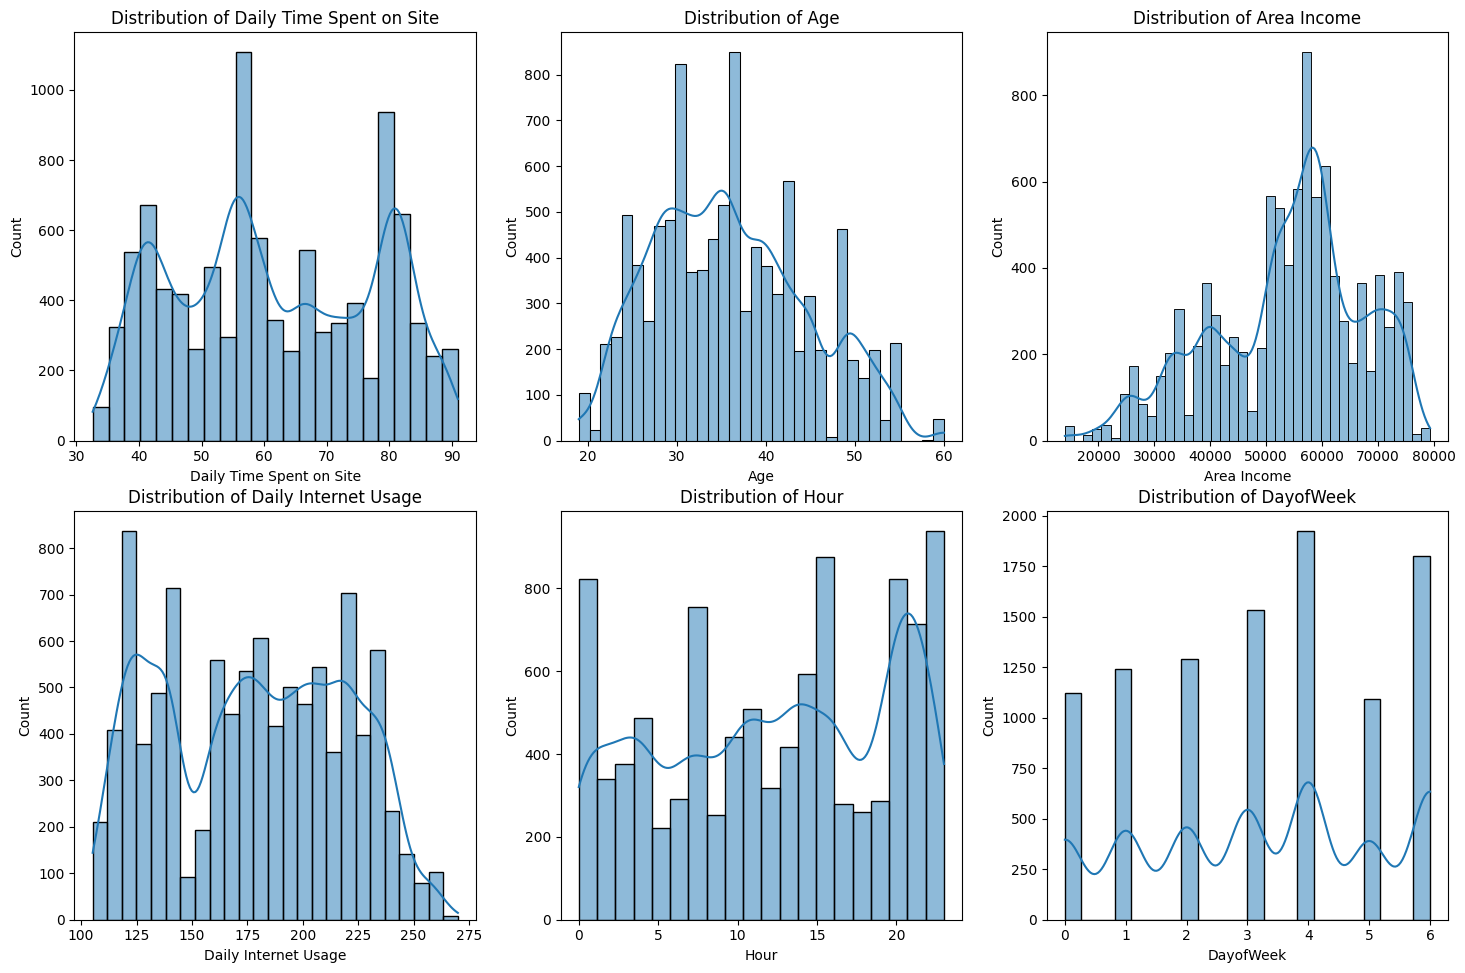

In [54]:
# Calculate the number of numerical columns
num_cols = len(df.select_dtypes(include='number').columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = 2
num_cols_grid = 3

# Create a figure and axes with enough subplots
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 10))
fig.tight_layout(pad=3.0)



axes = axes.flatten()

# Enumerate through numerical columns and use the index for subplot placement
for i, column in enumerate(df.select_dtypes(include='number').columns.drop(['Clicked on Ad', 'Month'])):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)


plt.show()

The numerical columns will be tranform to reduce skewness and to achieve a relatively normal distribution

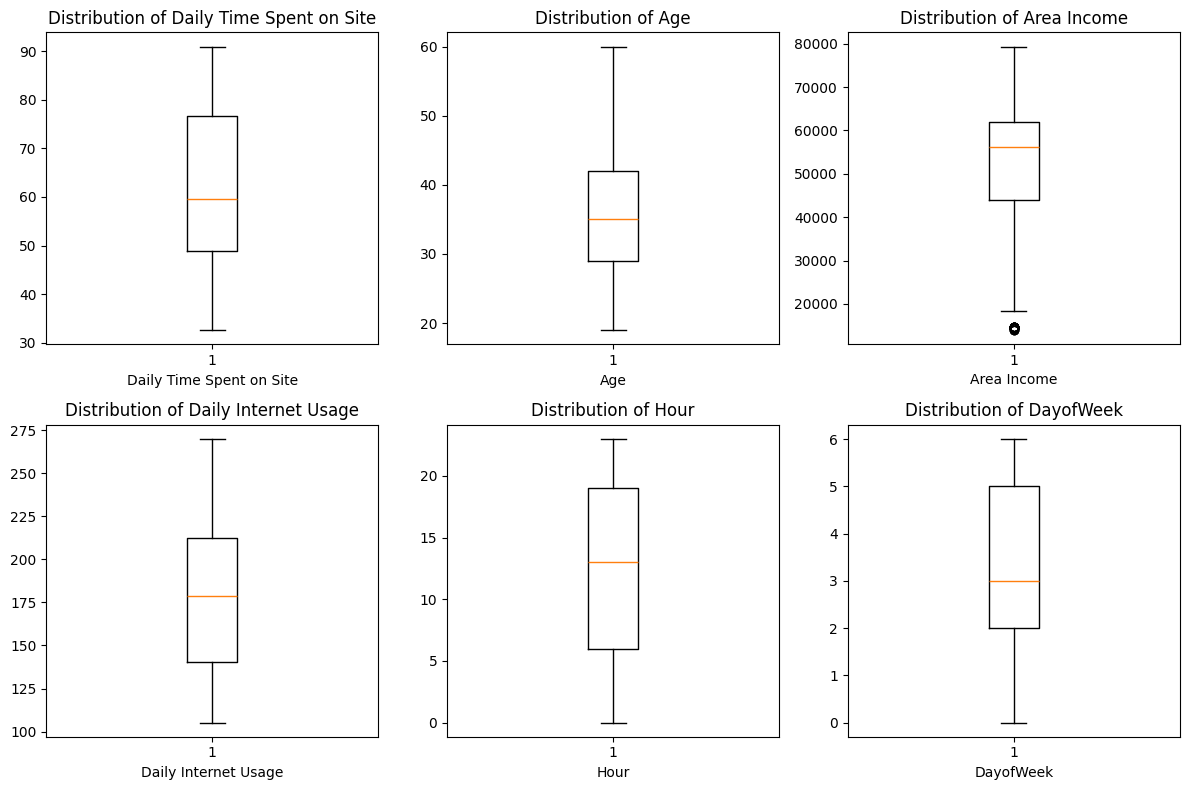

In [55]:
plt.figure(figsize=(12, 8))

# Enumerate through numerical columns and use the index for subplot placement
for i, column in enumerate(df.select_dtypes(include='number').columns.drop(['Clicked on Ad', 'Month'])):
    plt.subplot(2, 3, i + 1)  # Use i + 1 to get subplot index starting from 1
    plt.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [56]:
for x, y in enumerate(df.columns):
    print(f"Column '{y}' has {df[y].nunique()} unique values")

Column 'Daily Time Spent on Site' has 460 unique values
Column 'Age' has 39 unique values
Column 'Area Income' has 524 unique values
Column 'Daily Internet Usage' has 505 unique values
Column 'Ad Topic Line' has 559 unique values
Column 'City' has 521 unique values
Column 'Gender' has 2 unique values
Column 'Country' has 207 unique values
Column 'Timestamp' has 567 unique values
Column 'Clicked on Ad' has 2 unique values
Column 'Hour' has 24 unique values
Column 'DayofWeek' has 7 unique values
Column 'Month' has 7 unique values


Text(0.5, 1.0, 'Correlation Matrix')

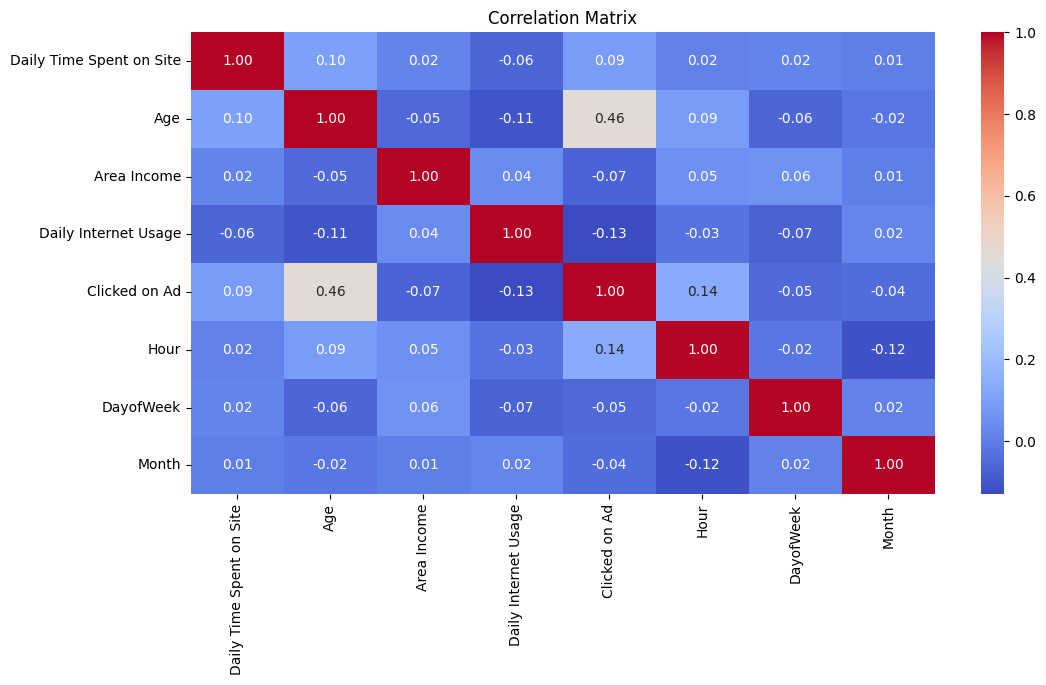

In [57]:
plt.figure(figsize=(12, 6))

# Enumerate through numerical columns and use the index for subplot placement
sns.heatmap(df[df.select_dtypes(include='number').columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix')


The coulmns are not highly correlated

## Analysis of Target Variable (Clicked on Ad)

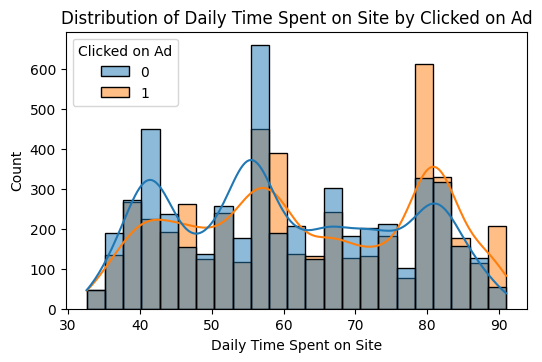

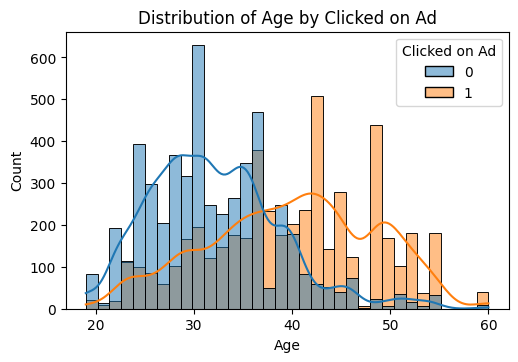

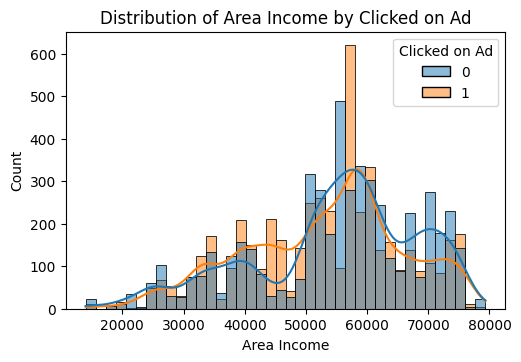

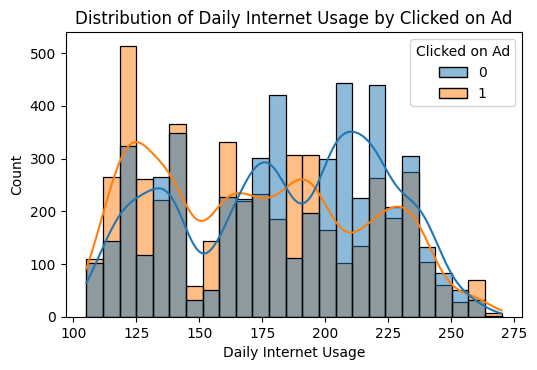

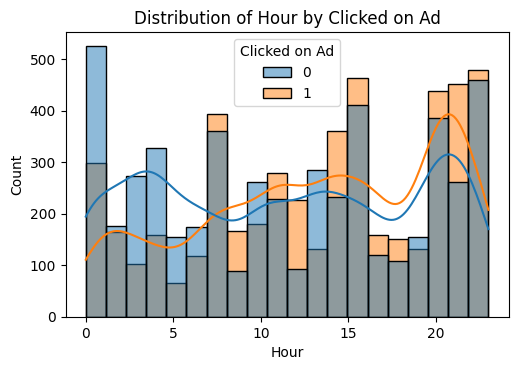

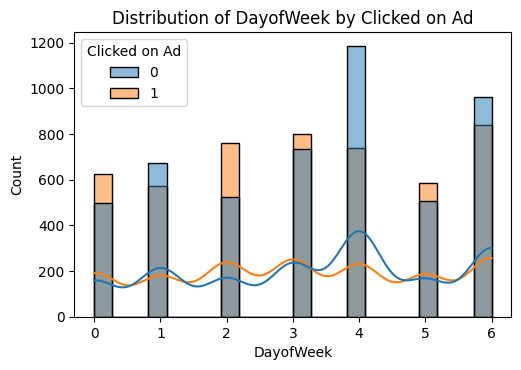

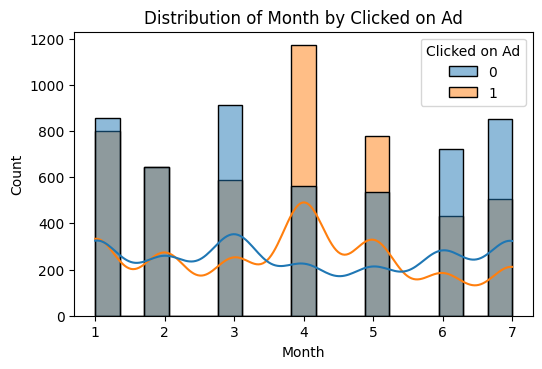

In [58]:
for i, column in enumerate(df.select_dtypes(include='number').columns.drop('Clicked on Ad')):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=column, hue='Clicked on Ad', kde=True)
    plt.title(f'Distribution of {column} by Clicked on Ad')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

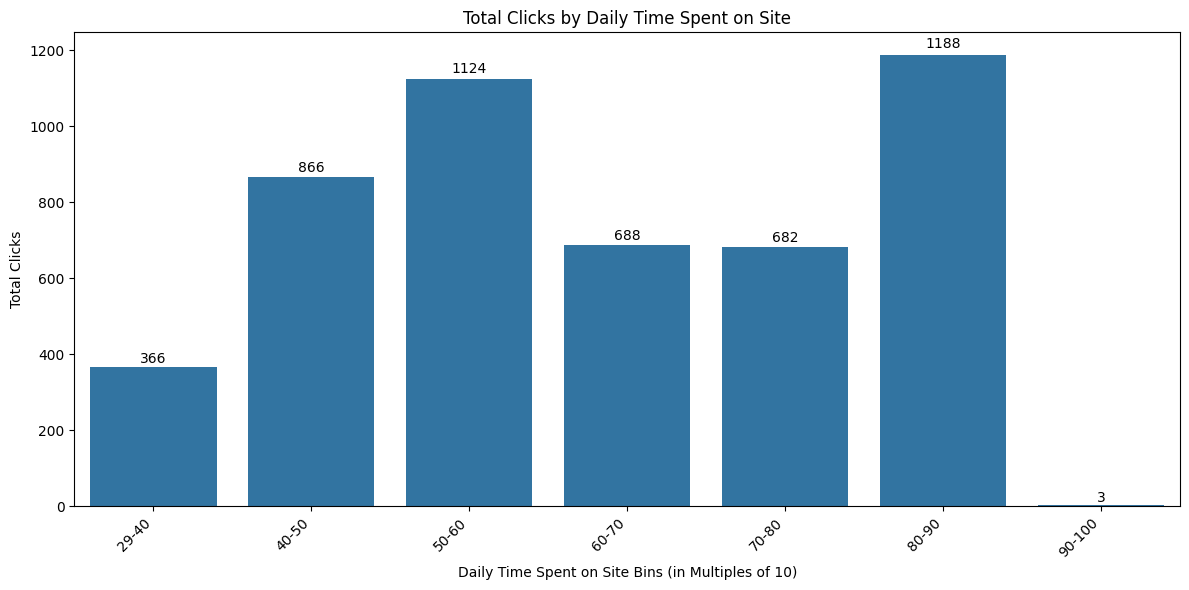

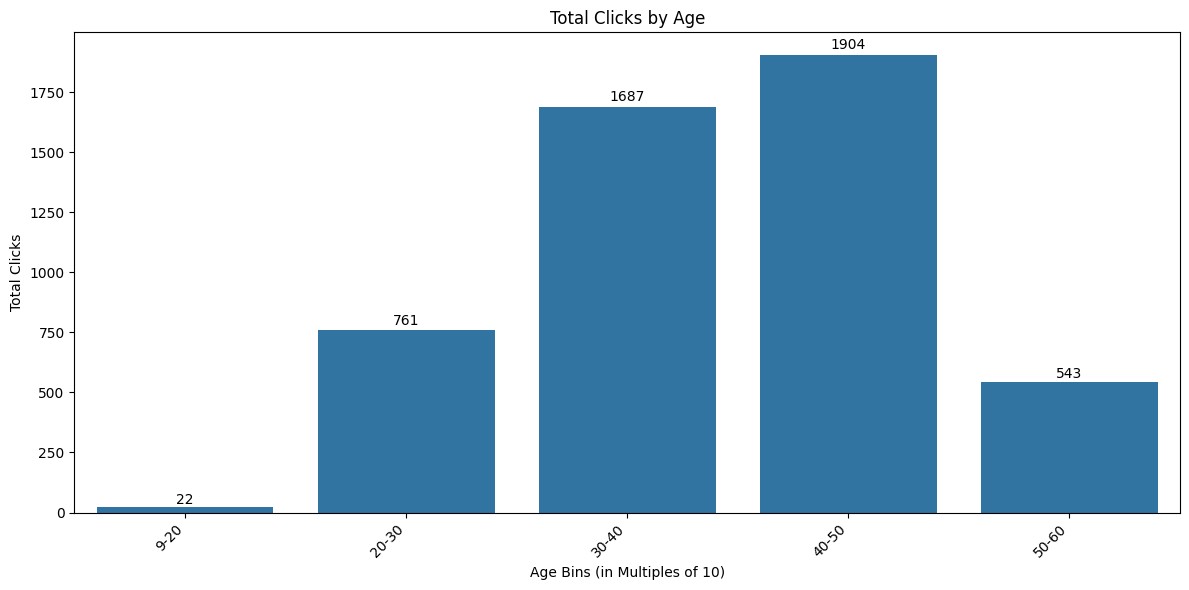

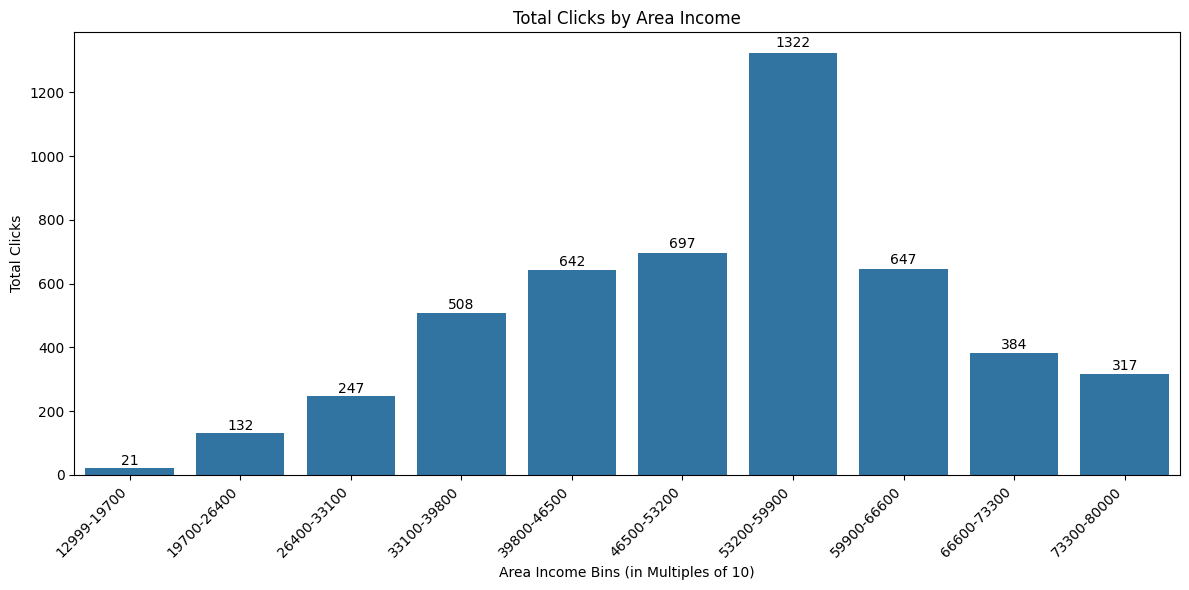

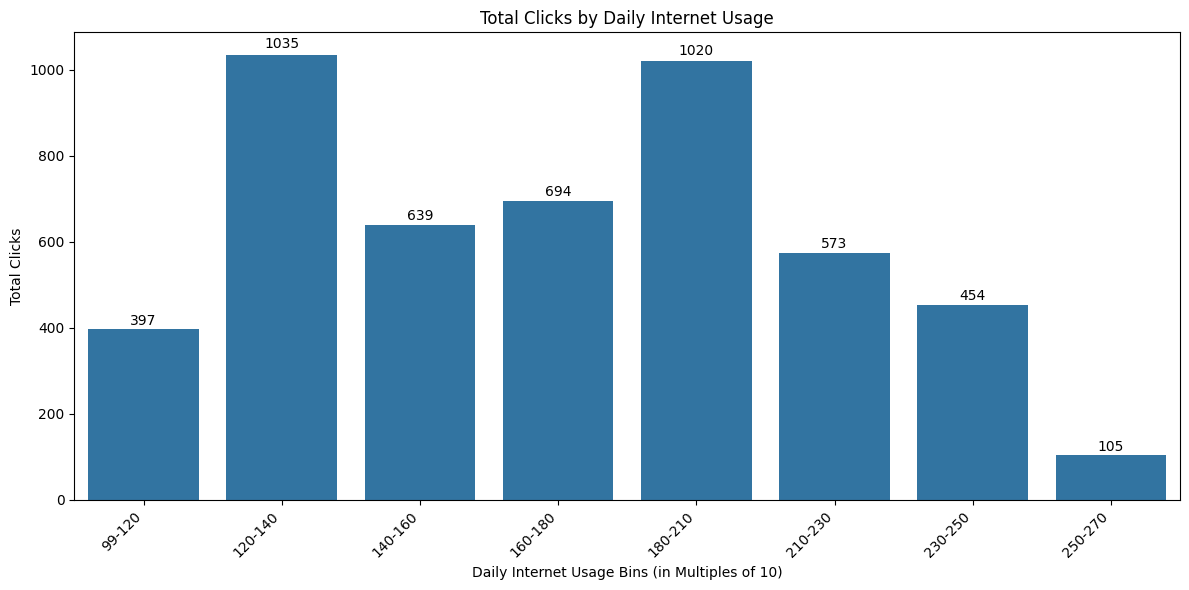

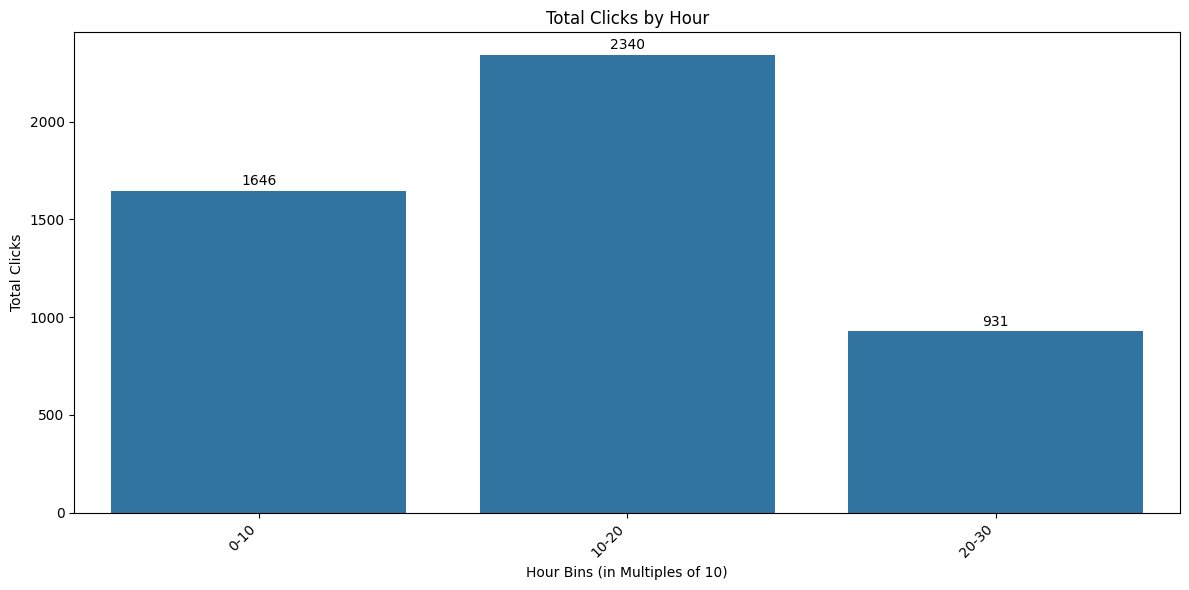

In [59]:
# Select relevant numerical columns for analysis, excluding 'Clicked on Ad'
columns_to_analyze = df.select_dtypes(include=['number']).columns. \
drop(['Clicked on Ad','DayofWeek', 'Month'], errors='ignore')

# Function to format and create bins for 'Area Income' and 'Daily Internet Usage'
def create_bins(df, column, num_bins, min_value=None, max_value=None):
    # Ensure the column data is numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')


    if min_value and max_value:
        # Use custom min and max for 'Area Income'
        bin_edges = np.linspace(min_value, max_value, num_bins + 1)
    else:
        # For other columns, calculate min and max from data
        min_value = np.floor(df[column].min() / 10) * 10
        max_value = np.ceil(df[column].max() / 10) * 10
        bin_edges = np.linspace(min_value, max_value, num_bins + 1)

    # Sort the bin edges in increasing order
    bin_edges = np.sort(bin_edges)

    bin_edges = np.round(bin_edges, -1)

    # Bin the data and drop duplicate edges
    df['binned'] = pd.cut(df[column], bins=bin_edges, duplicates='drop',
                          include_lowest=True)

    # Get unique bins and create labels
    unique_bins = df['binned'].cat.categories
    bin_labels = [f'{int(b.left)}-{int(b.right)}' for b in unique_bins]

    # Re-apply labels to the binned column
    df['binned'] = pd.cut(df[column], bins=bin_edges, labels=bin_labels,
                          include_lowest=True, duplicates='drop')

    return df, bin_edges

# Group by each column (binned) and calculate total clicks, then plot
for column in columns_to_analyze:
    # Apply custom binning logic for 'Area Income' and 'Daily Internet Usage'
    if column == 'Area Income':
        # Custom min and max for 'Area Income' (13,000 to 80,000)
        df, bin_edges = create_bins(df, column, 10, min_value=13000, max_value=80001)
    elif column == 'Daily Internet Usage':
        # Use default binning for 'Daily Internet Usage' with 8 bins
        df, bin_edges = create_bins(df, column, 8)
    else:
        # For other columns, use standard binning with 10 bins
        df, bin_edges = create_bins(df, column, 10)

    # Group by bins and calculate total clicks
    click_counts = df.groupby('binned')['Clicked on Ad'].sum().reset_index()

    # Create bar plot
    plt.figure(figsize=(12, 6))  # Adjust figure size to accommodate labels
    sns.barplot(x='binned', y='Clicked on Ad', data=click_counts)

    # Annotate each bar
    for index, row in click_counts.iterrows():
        plt.text(
            index,  # x-coordinate (position of the bar)
            row['Clicked on Ad'] + row['Clicked on Ad'] * 0.008,
            str(row['Clicked on Ad']),  # Value to display
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Title and labels
    plt.title(f'Total Clicks by {column}')
    plt.xlabel(f'{column} Bins (in Multiples of 10)')
    plt.ylabel('Total Clicks')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Drop 'DayofWeek', 'Hour', and 'Month' columns after all necessary processing
df.drop(columns=['DayofWeek', 'Hour', 'Month'], errors='ignore', inplace=True)


In [86]:
# Function to format days of the week
def format_day(day_number):
    days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
    return days[day_number]

# Function to format months
def format_month(month_number):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
              "Oct", "Nov", "Dec"]
    return months[month_number - 1]

# Extract features from the Timestamp column
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Day of Week'] = pd.to_datetime(df['Timestamp']).dt.dayofweek.apply(format_day)
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month.apply(format_month)

# Bin the 'Hour' column into 6 bins
df['Hour Bin'] = pd.cut(df['Hour'], bins=6, labels=['0-3', '4-7', '8-11',
                          '12-15', '16-19', '20-23'], include_lowest=True)

# Define custom order for days of the week and months
day_order = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
               "Oct", "Nov", "Dec"]

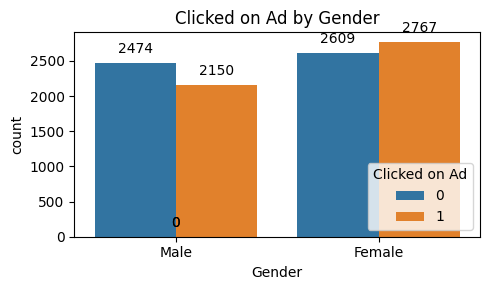

In [61]:
# Create the plot
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Gender', hue='Clicked on Ad', data=df)
plt.title('Clicked on Ad by Gender')

# Annotate the bars with their counts
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2  # Center the annotation
    y = height + 0.02 * max(df['Clicked on Ad'].value_counts())

    ax.annotate(
        f'{int(height)}',
        (x, y),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Ensure that the legend appears and is positioned correctly
plt.legend(title='Clicked on Ad', loc='lower right', bbox_to_anchor=(1, 0))
# Display the plot
plt.tight_layout()
plt.show()


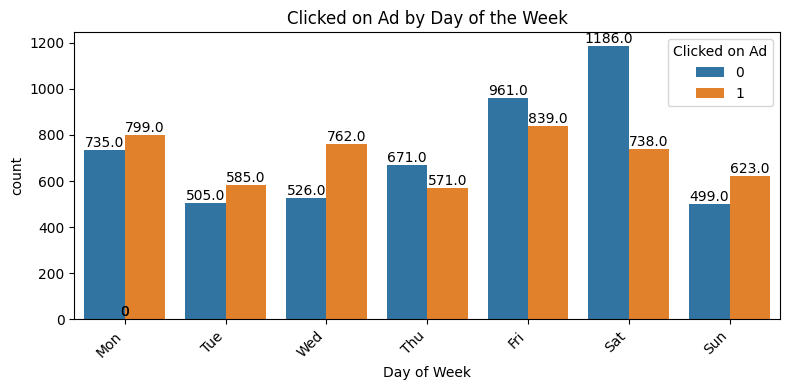

In [62]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Day of Week', hue='Clicked on Ad', data=df)
plt.title('Clicked on Ad by Day of the Week')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# 'DayofWeek' is numeric (0-6), set the labels to days of the week
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


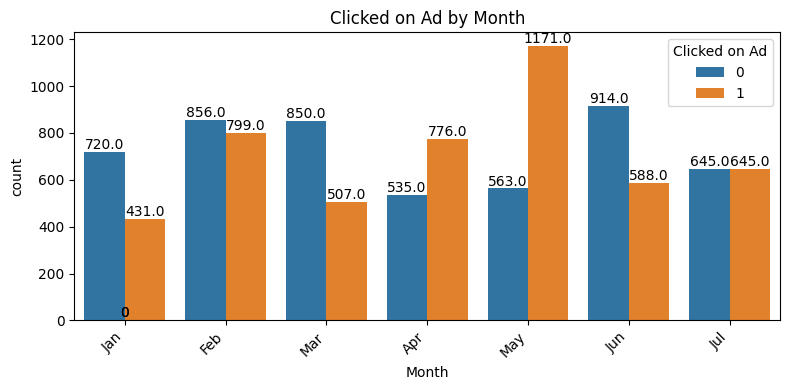

In [63]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Month', hue='Clicked on Ad', data=df)
plt.title('Clicked on Ad by Month')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# 'Month is numeric (1-7), set the labels to days of the week
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


## Model Building Before Preprocessing and Feature Engineering

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder



In [88]:
df=df.drop('Timestamp', axis = 1).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
df = dv.fit_transform(df)
df = pd.DataFrame(df, columns=dv.get_feature_names_out())
y = df['Clicked on Ad']
X = df.drop('Clicked on Ad', axis=1)
y = LabelEncoder().fit_transform(y)
x_full_train, x_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_full_train, y_full_train, test_size=0.25, random_state=42)

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)



In [90]:
# Calculate evaluation metrics
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model,
          'XGBoost': xgb_model, 'Gradient Boosting': gb_model,
          'Decision Tree': dt_model}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(x_val)[:, 1])
    cm = confusion_matrix(y_val, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, \
    Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")




Logistic Regression - Accuracy: 0.69, Precision: 0.70,     Recall: 0.65, F1: 0.67, AUC: 0.75
Confusion Matrix:
[[758 272]
 [340 630]]

Random Forest - Accuracy: 0.87, Precision: 0.87,     Recall: 0.86, F1: 0.86, AUC: 0.94
Confusion Matrix:
[[906 124]
 [140 830]]

XGBoost - Accuracy: 0.86, Precision: 0.86,     Recall: 0.85, F1: 0.86, AUC: 0.94
Confusion Matrix:
[[898 132]
 [146 824]]

Gradient Boosting - Accuracy: 0.81, Precision: 0.83,     Recall: 0.78, F1: 0.80, AUC: 0.90
Confusion Matrix:
[[873 157]
 [215 755]]

Decision Tree - Accuracy: 0.82, Precision: 0.82,     Recall: 0.82, F1: 0.82, AUC: 0.82
Confusion Matrix:
[[850 180]
 [172 798]]



In [92]:
# Calculate evaluation metrics with full_train and y_test set
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model,
          'XGBoost': xgb_model, 'Gradient Boosting': gb_model,
          'Decision Tree': dt_model}

for name, model in models.items():
    model.fit(x_full_train, y_full_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_val)[:, 1])
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, \
    Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")


Logistic Regression - Accuracy: 0.70, Precision: 0.71,     Recall: 0.66, F1: 0.68, AUC: 0.50
Confusion Matrix:
[[745 269]
 [333 653]]

Random Forest - Accuracy: 0.89, Precision: 0.89,     Recall: 0.88, F1: 0.89, AUC: 0.49
Confusion Matrix:
[[911 103]
 [117 869]]

XGBoost - Accuracy: 0.89, Precision: 0.90,     Recall: 0.89, F1: 0.89, AUC: 0.49
Confusion Matrix:
[[914 100]
 [112 874]]

Gradient Boosting - Accuracy: 0.83, Precision: 0.85,     Recall: 0.79, F1: 0.82, AUC: 0.50
Confusion Matrix:
[[882 132]
 [208 778]]

Decision Tree - Accuracy: 0.83, Precision: 0.82,     Recall: 0.84, F1: 0.83, AUC: 0.49
Confusion Matrix:
[[832 182]
 [162 824]]



## Data Preprocessing and Feature Engineering

In [72]:
df = df.drop_duplicates()

print(f'Number of duplicates {df.duplicated().sum()}')

Number of duplicates 0


In [73]:
df['Is_Weekend'] = df['Day of Week'].apply(lambda x: 1 if x in [5, 6] else 0)
df['Time_Spent_Ratio'] = df['Daily Time Spent on Site'] / df['Daily Internet Usage']
df['Income_Per_Age'] = df['Area Income'] / df['Age']
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 29, 49, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Senior'])
df['Income_Bracket'] = pd.qcut(df['Area Income'], q=3, labels=['Low', 'Middle', 'High'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   object 
 5   City                      9785 non-null   object 
 6   Gender                    9785 non-null   object 
 7   Country                   9785 non-null   object 
 8   Timestamp                 9785 non-null   object 
 9   Clicked on Ad             9785 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 840.9+ KB


In [74]:
from scipy.stats import boxcox

# Numeric columns to transform
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Apply Box-Cox transformation
for col in numeric_cols:
    # Check if the column has any non-positive values
    if (df[col] <= 0).any():
        print(f"Column '{col}' contains non-positive values, cannot apply Box-Cox transformation.")
    else:
        # Apply Box-Cox transformation
        transformed_data, lambda_value = boxcox(df[col])
        df[col] = transformed_data
        print(f"Applied Box-Cox transformation to '{col}', lambda: {lambda_value}")


Applied Box-Cox transformation to 'Daily Time Spent on Site', lambda: 0.5708821414530986
Applied Box-Cox transformation to 'Age', lambda: 0.20211305655741071
Applied Box-Cox transformation to 'Area Income', lambda: 1.6759202012111862
Applied Box-Cox transformation to 'Daily Internet Usage', lambda: 0.7356948601736321


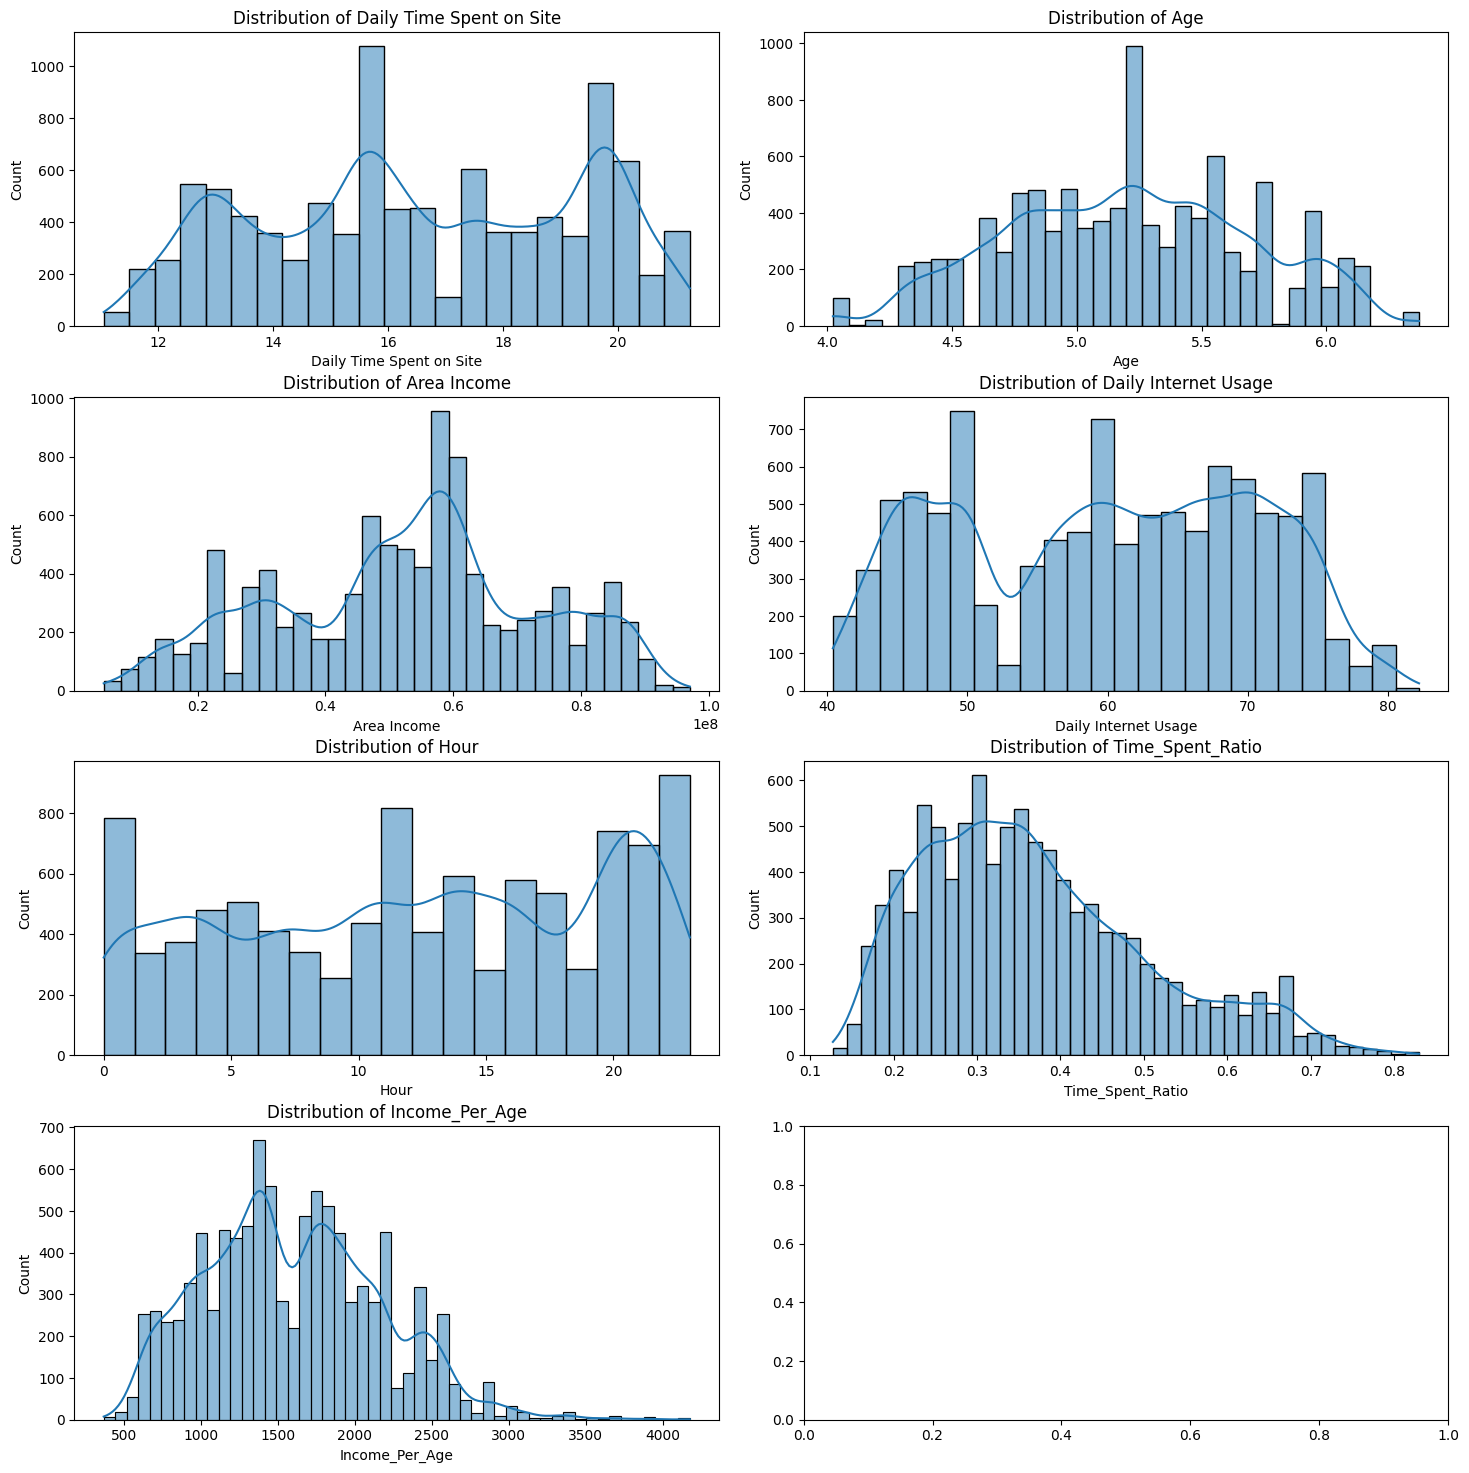

In [75]:
num_cols = len(df.select_dtypes(include='number').columns)

num_rows = 4
num_cols_grid = 2

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 15))
fig.tight_layout(pad=3.0)



axes = axes.flatten()

# Enumerate through numerical columns and use the index for subplot placement
for i, column in enumerate(df.select_dtypes(include='number').columns.drop(['Clicked on Ad', 'Is_Weekend'])):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)


plt.show()

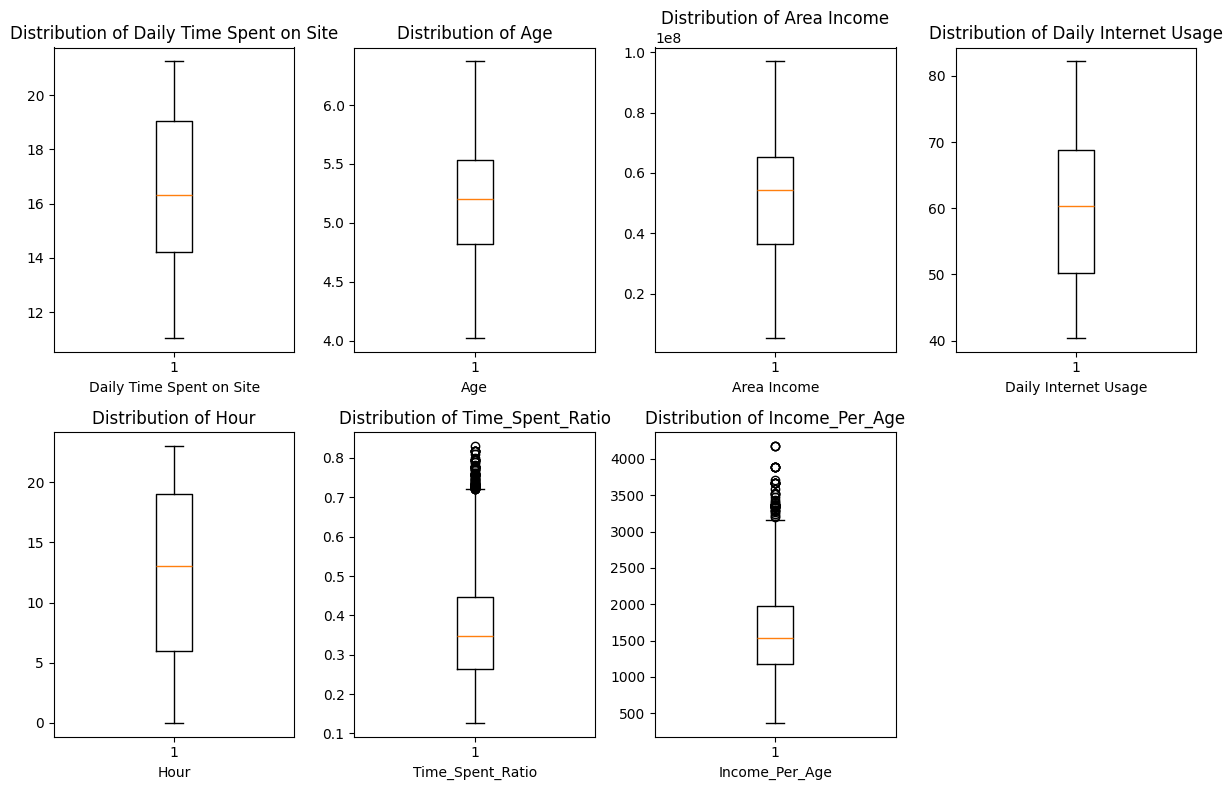

In [76]:
plt.figure(figsize=(12, 8))

# Enumerate through numerical columns and use the index for subplot placement
for i, column in enumerate(df.select_dtypes(include='number').columns.drop(['Clicked on Ad', 'Is_Weekend'])):
    plt.subplot(2, 4, i + 1)  # Use i + 1 to get subplot index starting from 1
    plt.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [77]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

df=df.drop('Timestamp', axis = 1).to_dict(orient='records')

In [78]:
dv = DictVectorizer(sparse=False)
df = dv.fit_transform(df)
scaler = RobustScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=dv.get_feature_names_out())
y = df['Clicked on Ad']
X = df.drop('Clicked on Ad', axis=1)
y = LabelEncoder().fit_transform(y)
x_full_train, x_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_full_train, y_full_train, test_size=0.25, random_state=42)

## Building a baseline model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier


In [80]:
# Calculate evaluation metrics
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model,
          'XGBoost': xgb_model, 'Gradient Boosting': gb_model,
          'Decision Tree': dt_model}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(x_val)[:, 1])
    cm = confusion_matrix(y_val, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, \
    Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

Logistic Regression - Accuracy: 0.87, Precision: 0.86,     Recall: 0.88, F1: 0.87, AUC: 0.94
Confusion Matrix:
[[882 132]
 [115 828]]

Random Forest - Accuracy: 0.85, Precision: 0.84,     Recall: 0.85, F1: 0.85, AUC: 0.93
Confusion Matrix:
[[866 148]
 [138 805]]

XGBoost - Accuracy: 0.86, Precision: 0.86,     Recall: 0.86, F1: 0.86, AUC: 0.94
Confusion Matrix:
[[879 135]
 [133 810]]

Gradient Boosting - Accuracy: 0.81, Precision: 0.82,     Recall: 0.77, F1: 0.80, AUC: 0.89
Confusion Matrix:
[[856 158]
 [213 730]]

Decision Tree - Accuracy: 0.80, Precision: 0.79,     Recall: 0.80, F1: 0.80, AUC: 0.80
Confusion Matrix:
[[811 203]
 [185 758]]



## Model with Hyperparameter Tuning

In [81]:
lr_model = LogisticRegression(random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga']  # Solver algorithm for optimization
}


grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,  # Use all processors
                           verbose=2)


grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score: .2f}")



Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy:  0.88


In [83]:
# Train the best model with full training data
best_model = grid_search.best_estimator_
best_model.fit(x_full_train, y_full_train)

# Evaluate the model on the test set
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, \
Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{cm}\n")


Accuracy: 0.81, Precision: 0.81, Recall: 0.80, F1: 0.81, AUC: 0.81
Confusion Matrix:
[[829 182]
 [186 760]]

